# main.ipynb
This notebook lets you use entsoe-py repository in a simple intuitive way.

* Author: Timur Kasimov
* Date Created: July 1, 2024
* Date Updated: July 2024



In [2]:
# import necessary libraries and repo-internal scripts
import plotter
import sampler
import scraper
import parsers
import psr_groups
import country_groups
import mappings
import mykey
import entsoe as ent

import os
import pandas as pd
import logging
import pytz
import requests
from bs4 import BeautifulSoup
from time import sleep

import aiohttp
import asyncio


if 'data' in os.listdir():
    os.chdir('data')

!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()

## PLOTTING

Plotting relies on data having been scraped and resampled to necessary **frequency and region**.

* original raw data is country-specific and saved in ./data/country_name.xlsx
* country specific data with specific frequency is saved in ./data/[FREQ]/[country_name freq].xlsx
* region specific data with specified frequency is saved in ./data/combined/[region freq].xlsx
  

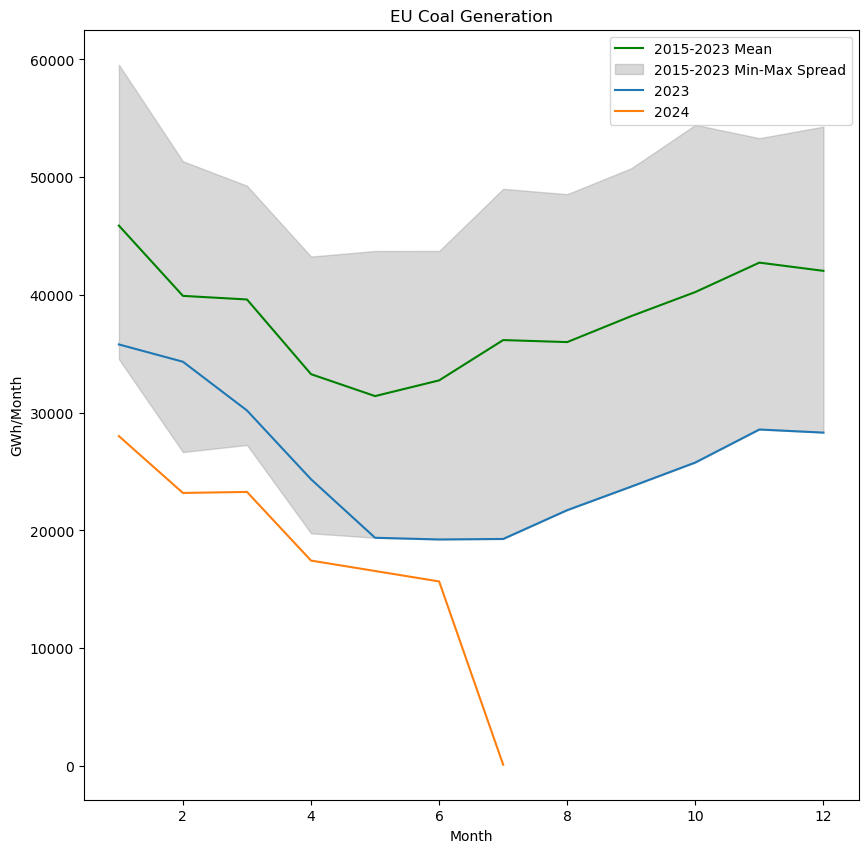

In [17]:
 ### REGION ###
region = 'EU'   # name of the combined region as saved in excel files
freq = '1M'     # frequency as saved in excel files


### YEARS FOR MIN-MAX SPREAD AND MEAN LINE ###
start_spread = 2015     
end_spread = 2023   


### GENERATION TYPE/GROUP ###
# psr_codes = psr_groups.SOLAR_WIND # group for type of generation (see psr_groups.py and mappings.py)
# psr_label = 'Solar, Wind' # custom label for generation type

psr_codes =['B02', 'B05']  # group for type of generation (see psr_groups.py and mappings.py)
psr_label = 'Coal' # custom label for generation type


### YEAR-SPECIFIC PLOTS ###
start_year = 2023
end_year =2024


### PLOTTING ###
plotter.my_plot(region, freq, psr_codes, psr_label, range=(start_spread, end_spread), years=range(start_year, end_year+1), output_table_file=True)

# You can compare monthly generation values here:
# https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Energy_statistics_-_latest_trends_from_monthly_data

## REGION RESAMPLER
This code aggregates data for a specific region (EU, TOP5EU, etc)
* Relies on having the country-specific data of specified frequency

In [8]:
country_codes = country_groups.EU
# country_codes = ['RO']
freq = '1M'
start_year = 2015
end_year = 2024


# # records combined values for the region in the ./combined folder
sampler.aggregate_region(country_codes, freq, start_year, end_year, name='EU') 
print('Complete')

2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
Complete


##  FREQUENCY RESAMPLER

Changes the raw data to desired frequency data for all countries
* the variable ```freq``` uses pandas frequencies:
    * ```'1M'``` - 1 month
    * ```'1W'``` - 1 Week
    * ```'1D'``` - 1 Day

  
* set ```append``` to ```False``` if creating a new frequency format, to ```True``` if updating existing files with most recent data


In [6]:
country_codes = country_groups.EU # all 27 EU countries
# country_codes = ['PL'] # alternative specification

freq = '1M' 
append = True

start_year = 2024 # earliest available is 2015
end_year = 2024 




# #########################################################
# ### RUN THIS ONLY WHEN UPDATING COUNTRY-SPECIFIC DATA ###
# #########################################################
# # records new frequency for each country in a respective folder
sampler.record_new_frequency(country_codes, freq, start_year, end_year, append)
print("Complete")

Austria
Belgium
Bulgaria
Croatia
Cyprus
Complete


## SCRAPER

This code pulls data directly from ENTSO-E platform. Use this to update the generation values
for the most recent year at once 

**THIS CODE TAKES A LONG TIME TO RUN**


In [5]:
KEY = mykey.get_key()
ent_app = ent.Entsoe(KEY) # my api key/token

start = 2024 # 2015 is the earliest year available
end = 2024 # current year is the latest available

country_code_list = country_groups.EU
# country_code_list = ['PL']



scraper.generation_scraper(start, end, country_code_list, ent_app)
print('Complete')

# make sure to check excel files and/or xml files to ensure data
# was succesfully retrieved

Austria
GET returning??
completed all get requests
Parsing 2024
Belgium
GET returning??
completed all get requests
Parsing 2024
Bulgaria
GET returning??
completed all get requests
Parsing 2024
Croatia
GET returning??
completed all get requests
Parsing 2024
Cyprus
GET returning??
completed all get requests
Parsing 2024
Complete
